In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open('multi.csv','r') as f:
    lines = f.readlines()
    
info = {}
for l in lines:
    a = [a.strip() for a in l.split(',')]
    if a[0] not in info:
        info[a[0]] = {}
    if a[1] not in info[a[0]]:
        info[a[0]][a[1]] = {}
    if a[2] not in info[a[0]][a[1]]:
        info[a[0]][a[1]][a[2]] = [[],[],[]]
    info[a[0]][a[1]][a[2]][0].append(a[3])
    info[a[0]][a[1]][a[2]][1].append(a[4])
    info[a[0]][a[1]][a[2]][2].append(a[5])
    
for a in info.keys():
    for b in info[a].keys():
        for c in info[a][b].keys():
            info[a][b][c][0] = np.mean([float(i) for i in info[a][b][c][0]])
            info[a][b][c][1] = np.mean([float(i) for i in info[a][b][c][1]])
            info[a][b][c][2] = np.mean([float(i) for i in info[a][b][c][2]])

In [3]:
print(info.keys())
print(info['./vectorized'].keys())
print(info['./vectorized']['32'].keys())
print(info['./vectorized']['32']['32'])

dict_keys(['./vectorized', './multi'])
dict_keys(['2', '4', '8', '16', '32', '64', '128', '256', '512', '1024', '2048'])
dict_keys(['1', '2', '4', '8', '16', '32'])
[14.3167972, 0.0044, 208.319992]


In [4]:
vtimes = {}
for k in info['./vectorized']['32'].keys():
    vtimes[k] = []
    for a in info['./vectorized'].keys():
        vtimes[k].append(info['./vectorized'][a][k][0])

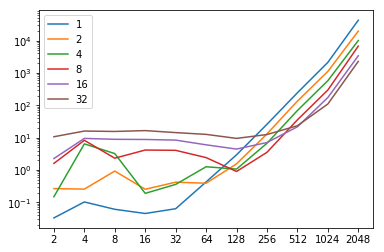

In [5]:
for key in vtimes.keys():
    plt.plot(vtimes[key],label=key)
plt.yscale('log')
plt.xticks(range(len(vtimes['4'])), [2**(i+1) for i in range(len(vtimes['4']))])
plt.legend()
plt.show()

In [7]:
mtimes = {}
for k in info['./multi']['32'].keys():
    mtimes[k] = []
    for a in info['./multi'].keys():
        mtimes[k].append(info['./multi'][a][k][0])

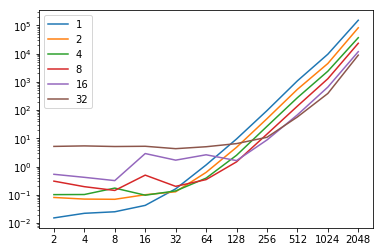

In [8]:
for key in mtimes.keys():
    plt.plot(mtimes[key],label=key)
plt.yscale('log')
plt.xticks(range(len(mtimes['4'])), [2**(i+1) for i in range(len(mtimes['4']))])
plt.legend()
plt.show()

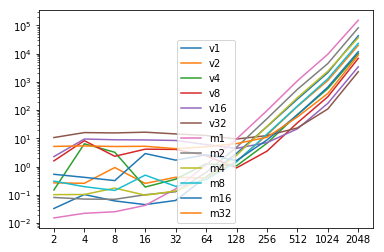

In [9]:
for key in vtimes.keys():
    plt.plot(vtimes[key],label='v'+key)
for key in mtimes.keys():
    plt.plot(mtimes[key],label='m'+key)
plt.yscale('log')
plt.xticks(range(len(mtimes['4'])), [2**(i+1) for i in range(len(mtimes['4']))])
plt.legend()
plt.show()